In [1]:
from matplotlib import pyplot as plt
import numpy as np
import astropy 
import astropy.units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore")
plt.style.use(['science' , 'notebook', 'grid'])

In [2]:
# para simulação
ipix, Nstar, M_V, SNR, L, B, RA_pix, DEC_pix, r_exp_pc, ell, pa, mass, dist = np.loadtxt('simulated.txt', unpack=True)

In [3]:
# para demais floats de detecção
N_det, RA_det, DEC_det, wrad, DistDet_kpc, m_M_det, SNR_det, wave_peak, \
Dist2object_arcmin, hlr_times_3_arcmin, SNR_rank, \
Wave_r3, DistSimulation_kpc, m_M_simulation, M_m_Det_minus_Sim, \
SNR_est = np.loadtxt('detected.txt', usecols=(0,1,2,3,4,5,6,7,9,10,12,13,14,16,17,18), unpack=True)

In [4]:
N, HPX64, N0_order = np.loadtxt('detected.txt', usecols=(0,15,19), dtype=int, unpack=True)

In [5]:
#para os strings de detecção
Name, Class = np.loadtxt('detected.txt', usecols=(8,11), dtype=str, unpack=True)

62
62
[ 2 54 28 31 53 39 55  8 32 14 56 44 29 58 41 60 43 48 13 23  4 34 36 45
 26 21 10 24  9 27 50 20 25  3 61 38 33 11 51  6 12 16 62 49 59  1 22 18
  7 63 65  5 15 40 52 46 19 35 47 64 37 17]


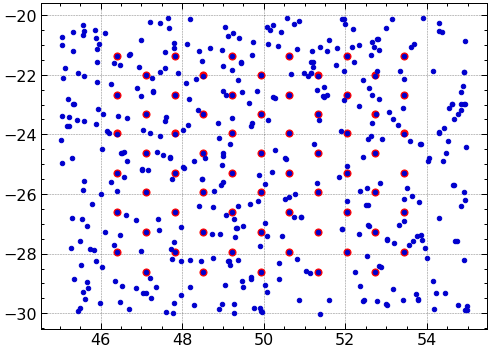

In [40]:
# MATCH POSICIONAL DE DADOS SIMULADOS COM DETECTADOS
r_hl_pc = 1.7 * r_exp_pc
r_deg = (180. / np.pi) * np.arctan(1. * r_hl_pc / dist)
coord_sim = SkyCoord(ra=RA_pix*u.degree, dec=DEC_pix*u.degree)
coord_det = SkyCoord(ra=RA_det*u.degree, dec=DEC_det*u.degree)
max_sep = r_deg * u.degree
idx, d2d, d3d = coord_sim.match_to_catalog_3d(coord_det)
sep_constraint = d2d < max_sep
sim_matches = coord_sim[sep_constraint]
det_matches = coord_det[idx[sep_constraint]]
idx = idx[sep_constraint]
print(len(sim_matches))
print(len(det_matches))
print (idx)
plt.scatter(RA_pix, DEC_pix,c="r", s = 50)
plt.scatter(RA_det,DEC_det,c="mediumblue", s= 20)
plt.show()

In [41]:
# Aqui se pode ver que o primeiro match dos simulados eh
# feito com os detectados e o indice eh idx
print(RA_pix[0], DEC_pix[0], RA_det[idx[0]], DEC_det[idx[0]])


M_V_det = np.array([j for i, j in enumerate(M_V) if i in idx])
print(M_V_det)
print(M_V)

52.7344 -28.631 52.7355 -28.6327
[-8.62 -8.55 -8.66 -8.48 -8.49 -8.62 -8.52 -8.67 -8.53 -8.54 -8.62 -8.53
 -8.46 -8.61 -8.44 -8.42 -8.53 -8.54 -8.54 -8.48 -8.62 -8.54 -8.47 -8.55
 -8.65 -8.67 -8.62 -8.63 -8.51 -8.54 -8.55 -8.68 -8.46 -8.62 -8.64 -8.48
 -8.55 -8.48 -8.42 -8.52 -8.64 -8.64 -8.65 -8.62 -8.54 -8.53 -8.54 -8.46
 -8.49 -8.47 -8.43 -8.55 -8.62 -8.54 -8.62 -8.66 -8.52 -8.55 -8.53 -8.64
 -8.62 -8.56]
[-8.54 -8.62 -8.55 -8.66 -8.48 -8.49 -8.62 -8.52 -8.67 -8.53 -8.54 -8.62
 -8.53 -8.46 -8.61 -8.44 -8.42 -8.53 -8.54 -8.54 -8.48 -8.62 -8.54 -8.47
 -8.55 -8.65 -8.67 -8.62 -8.63 -8.51 -8.65 -8.54 -8.55 -8.68 -8.46 -8.62
 -8.64 -8.48 -8.55 -8.48 -8.42 -8.52 -8.68 -8.64 -8.64 -8.65 -8.62 -8.54
 -8.53 -8.54 -8.46 -8.49 -8.47 -8.43 -8.55 -8.62 -8.54 -8.62 -8.62 -8.66
 -8.52 -8.55 -8.53 -8.64 -8.62 -8.56]


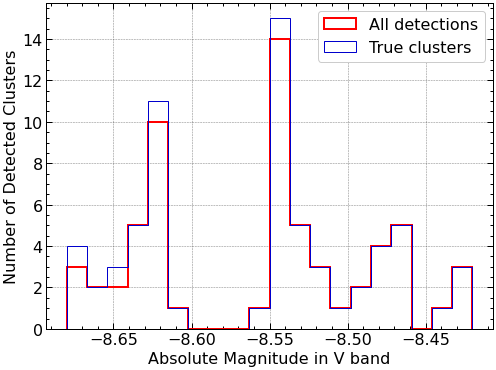

In [42]:
# PARA MAGNITUDE ABSOLUTA VISUAL
A = plt.hist(M_V_det, bins=20, range=(np.min(M_V), np.max(M_V)), histtype='step', lw=2, color = "r",  label='All detections')
B = plt.hist(M_V, bins=20, range=(np.min(M_V), np.max(M_V)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
# stepfilled para preenchimento do histograma
plt.xlabel('Absolute Magnitude in V band')
plt.ylabel( 'Number of Detected Clusters')
plt.legend()
plt.show()


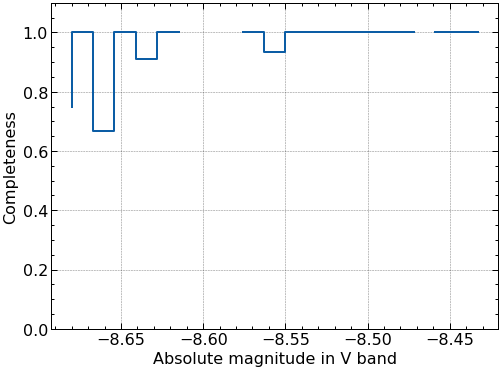

In [43]:
#PARA COMPLETEZA DA MAGNITUDE ABSOLUTA VISUAL
plt.step(A[1][0:-1],completeness)
plt.xlabel('Absolute magnitude in V band')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

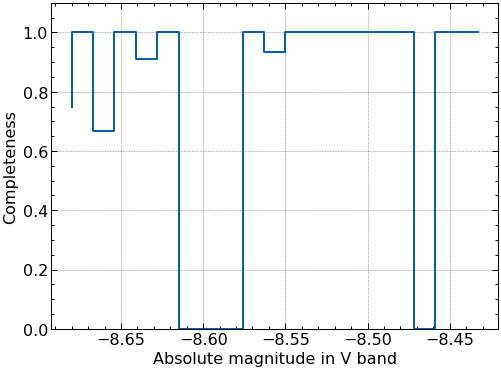

In [44]:
##PARA COMPLETEZA DA MAGNITUDE ABSOLUTA VISUAL FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Absolute magnitude in V band')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

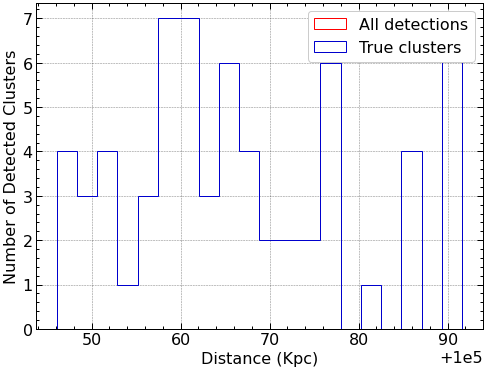

In [11]:
# PARA DISTANCIA KPC
A = plt.hist(DistDet_kpc, bins=20, range=(np.min(dist), np.max(dist)), histtype='step', color = "r", label='All detections')
B = plt.hist(dist, bins=20, range=(np.min(dist), np.max(dist)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel('Distance (Kpc)')
plt.ylabel( 'Number of Detected Clusters')
plt.legend()
plt.show()

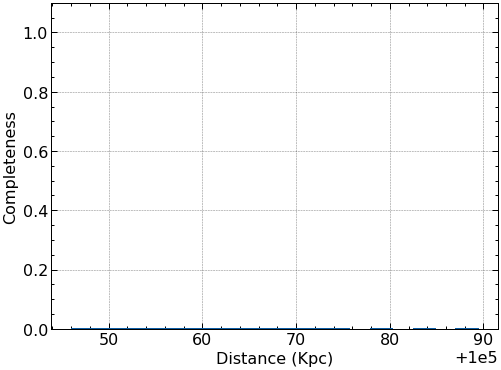

In [12]:
#PARA COMPLETEZA DA DISTANCIA KPC
plt.step(A[1][0:-1],completeness)
plt.xlabel('Distance (Kpc)')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

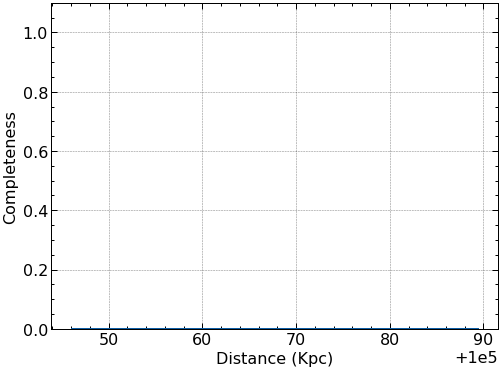

In [13]:
#PARA COMPLETEZA DA DISTANCIA KPC COM FILTRO DE NAN
plt.step(A[1][0:-1],np.nan_to_num(completeness))
plt.xlabel('Distance (Kpc)')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

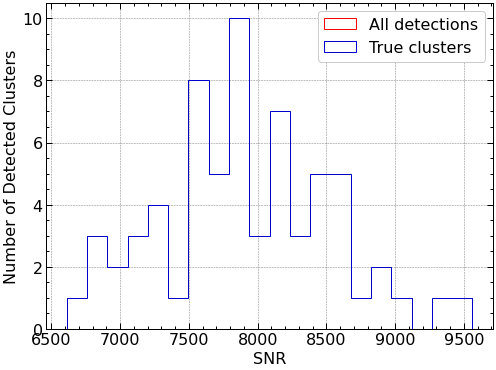

In [14]:
# PARA SNR
A = plt.hist(SNR_det, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "r", label='All detections')
B = plt.hist(SNR, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel('SNR')
plt.ylabel( 'Number of Detected Clusters')
plt.legend()
plt.show()


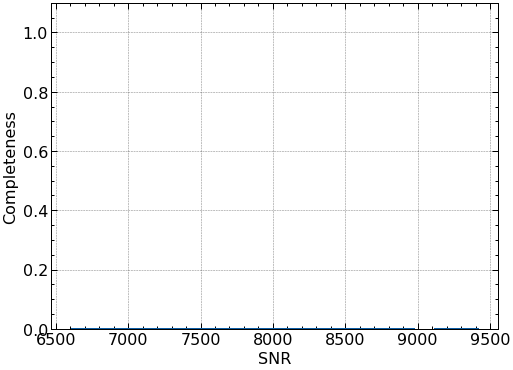

In [15]:
##PARA SNR
plt.step(A[1][0:-1],completeness)
plt.xlabel('SNR')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

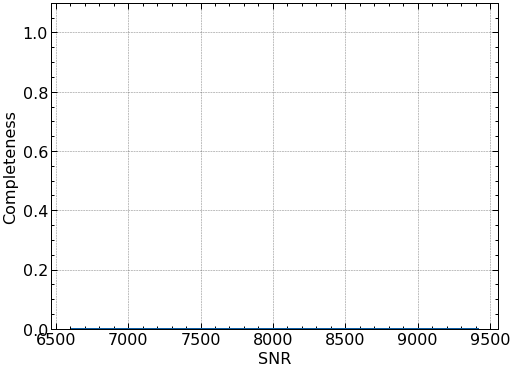

In [16]:
##PARA SNR FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('SNR')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

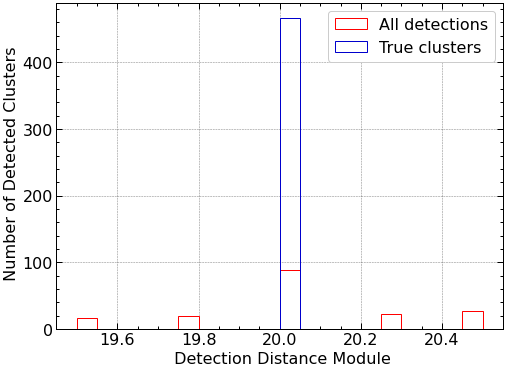

In [17]:
# PARA MODULO DE DISTANCIA DE DETECÇÃO
A = plt.hist(m_M_det, bins=20, range=(np.min(m_M_simulation), np.max(m_M_simulation)), histtype='step', color = "r", label='All detections')
B = plt.hist(m_M_simulation, bins=20, range=(np.min(m_M_simulation), np.max(m_M_simulation)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel(' Detection Distance Module')
plt.ylabel(' Number of Detected Clusters')
plt.legend()
plt.show()


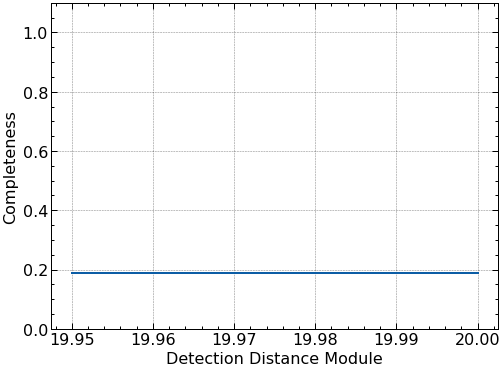

In [18]:
# PARA COMPLETEZA DO MODULO DE DISTANCIA DE DETECÇÃO
plt.step(A[1][0:-1],completeness)
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

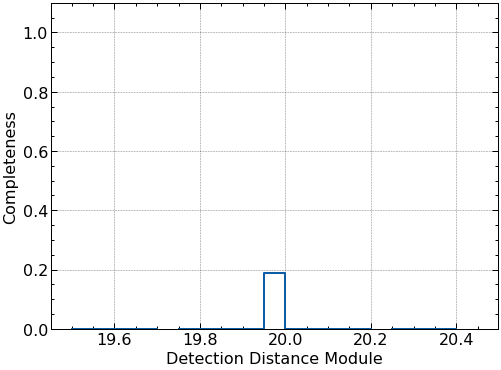

In [19]:
# PARA COMPLETEZA DO MODULO DE DISTANCIA DE DETECÇÃO COM FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

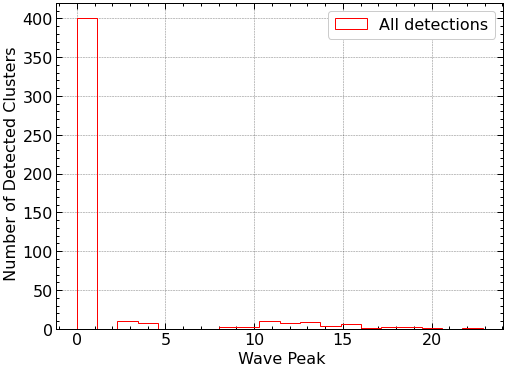

In [20]:
# PARA WAVE PEAK
A = plt.hist(wave_peak, bins=20, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', color = "r", label='All detections')
#B = plt.hist(m_M_simulation, bins=20, range=(np.min(m_M_simulation), np.max(m_M_simulation)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel(' Wave Peak')
plt.ylabel(' Number of Detected Clusters')
plt.legend()
plt.show()


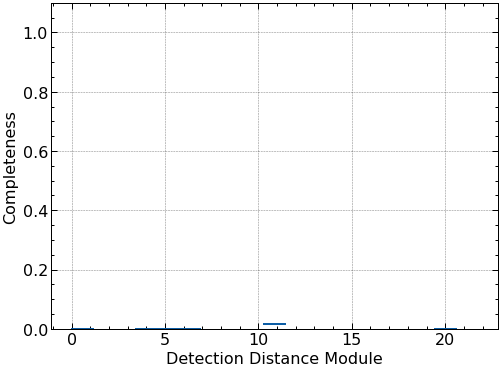

In [21]:
# PARA COMPLETEZA DO WAVE PEAK COM FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

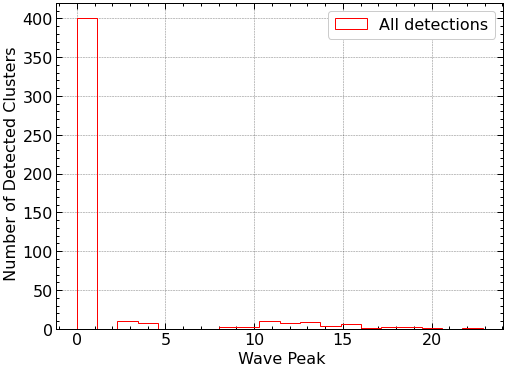

In [22]:
# PARA WAVE PEAK
A = plt.hist(wave_peak, bins=20, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', color = "r", label='All detections')
#B = plt.hist(m_M_simulation, bins=20, range=(np.min(m_M_simulation), np.max(m_M_simulation)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel(' Wave Peak')
plt.ylabel(' Number of Detected Clusters')
plt.legend()
plt.show()


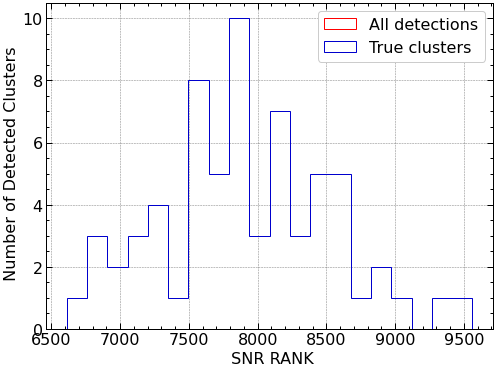

In [23]:
# PARA WAVE PEAK
A = plt.hist(SNR_rank, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "r", label='All detections')
B = plt.hist(SNR, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel(' SNR RANK')
plt.ylabel(' Number of Detected Clusters')
plt.legend()
plt.show()


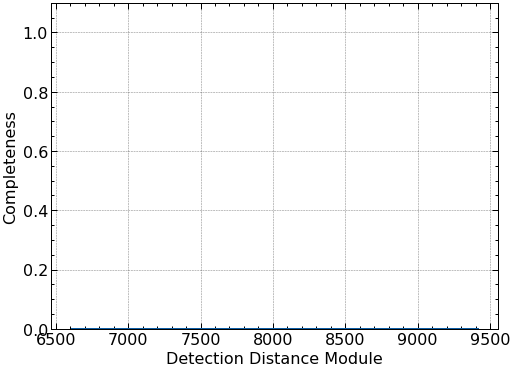

In [24]:
# PARA COMPLETEZA DO WAVE PEAK COM FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

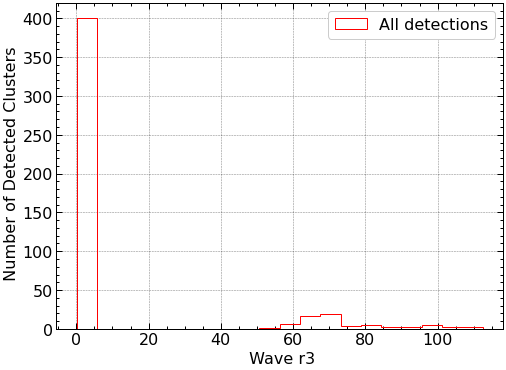

In [25]:
# PARA WAVE r3
A = plt.hist(Wave_r3, bins=20, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', color = "r", label='All detections')
#B = plt.hist(m_M_simulation, bins=20, range=(np.min(m_M_simulation), np.max(m_M_simulation)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel(' Wave r3')
plt.ylabel(' Number of Detected Clusters')
plt.legend()
plt.show()

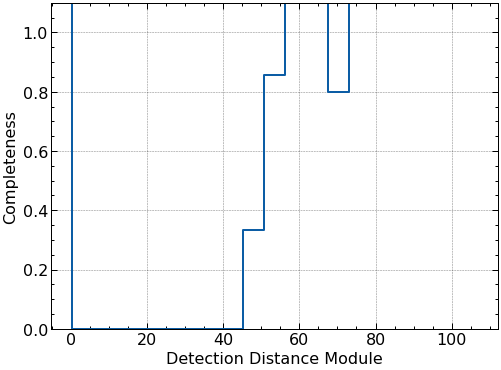

In [26]:
# PARA COMPLETEZA DO WAVE PEAK COM FILTRO DE NAN
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

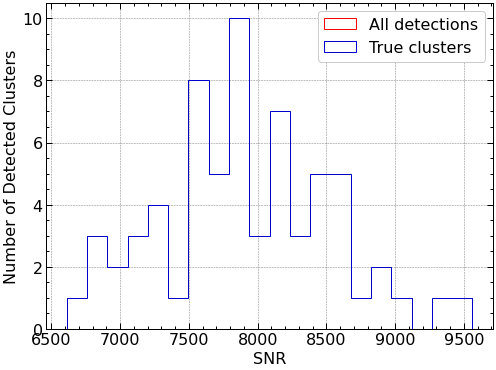

In [27]:
# PARA SNR
A = plt.hist(SNR_est, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "r", label='All detections')
B = plt.hist(SNR, bins=20, range=(np.min(SNR), np.max(SNR)), histtype='step', color = "mediumblue", label='True clusters')
completeness = A[0] / B[0]
plt.xlabel('SNR')
plt.ylabel( 'Number of Detected Clusters')
plt.legend()
plt.show()

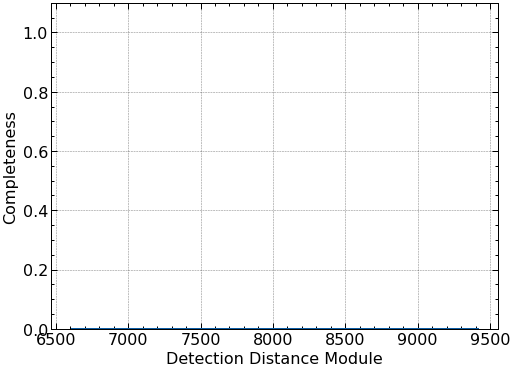

In [28]:
plt.step(A[1][0:-1], np.nan_to_num(completeness))
plt.xlabel('Detection Distance Module')
plt.ylabel('Completeness')
plt.ylim([0,1.1])
plt.show()

In [29]:
# Em relação à distância de detecção
# A = plt.hist(DistDet_kpc, bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='All detections')
# B = plt.hist(DistDet_kpc[real_det], bins=25, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label ='True Clusters')

In [30]:
# condicional para detecção confirmados ou candidatos
#real_det = (Class == 'conf')
#false_positive = (Class == 'cand')

In [31]:
# Em relação à distância de detecção
# A = plt.hist(DistDet_kpc, bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='All detections')
# B = plt.hist(DistDet_kpc[real_det], bins=25, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label ='True Clusters')

In [32]:
#Completeza para as distâncias
#A = plt.hist(DistDet_kpc[real_det], bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label ='True clusters')
#B = plt.hist(DistDet_kpc, bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label ='All detections')

In [33]:
#C = plt.hist(dist, bins=30,range=(np.min(dist),np.max(dist)),histtype='step', label='Simulated')

In [34]:
#completeness1 = A[0] / C[0]
#completeness = A[0] / B[0]

In [35]:
#plt.step(C[1][0:-1], np.nan_to_num(completeness1))
#plt.step(B[1][0:-1], np.nan_to_num(completeness))
#plt.xlabel('Distance (Kpc)')
#plt.ylabel('Completeness')
#plt.show()